In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Medidas de distancia

In [2]:
# Punto de referencia
punto = np.array([0.0, 0.0])

# Genero puntos para comparar distancias

# Puntos aleatorios
# n_random = 100
# x_points = np.random.uniform(-2, 2, n_random)
# y_points = np.random.uniform(-2, 2, n_random)

# Puntos en radios concéntricos
radii = [0.5, 1.0, 1.5, 2.0]
k = 20  # factor de densidad

x_points = []
y_points = []

for r in radii:
    n_points = max(6, int(k * r))  # mínimo 6 puntos por círculo
    theta = np.linspace(0, 2*np.pi, n_points, endpoint=False)
    x_points.extend(punto[0] + r * np.cos(theta))
    y_points.extend(punto[1] + r * np.sin(theta))

x_points = np.array(x_points)
y_points = np.array(y_points)

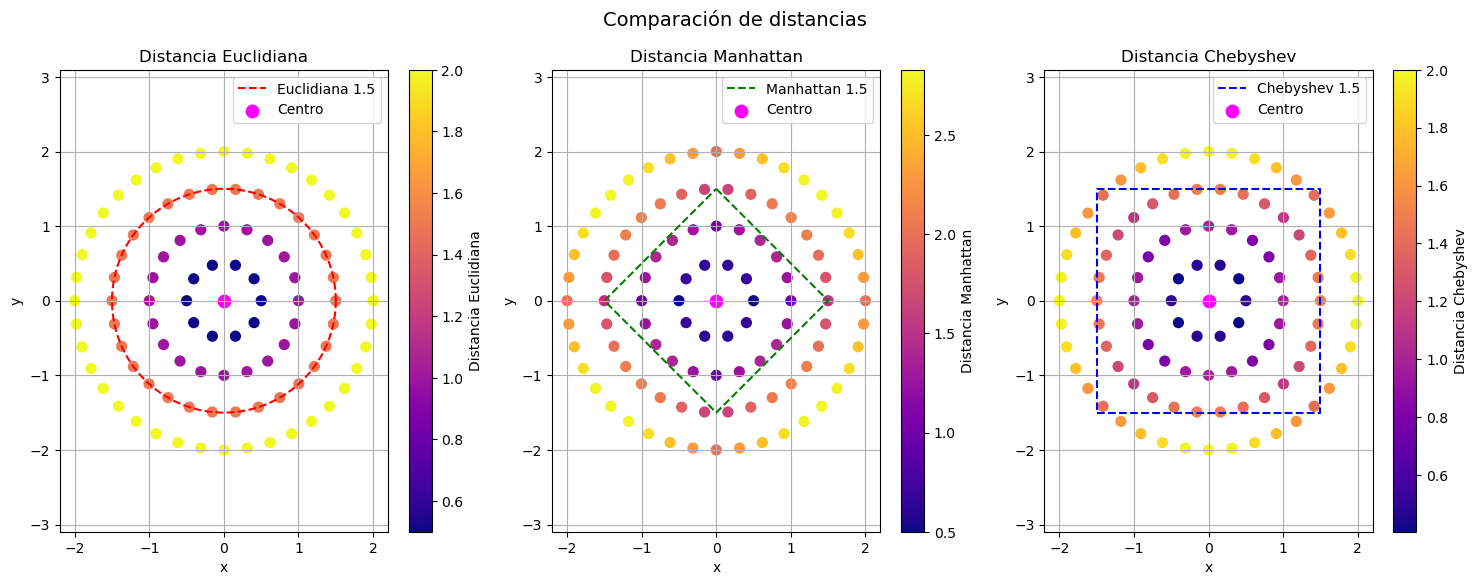

In [3]:
# Isodistancia
r = 1.5

# Isodistancia Euclidiana
theta = np.linspace(0, 2*np.pi, 400)
euclid_x = punto[0] + r * np.cos(theta)
euclid_y = punto[1] + r * np.sin(theta)

# Isodistancia Manhattan
manhattan_x = [punto[0], punto[0]+r, punto[0], punto[0]-r, punto[0]]
manhattan_y = [punto[1]+r, punto[1], punto[1]-r, punto[1], punto[1]+r]

# Isodistancia Chebyshev
chebyshev_x = [punto[0]-r, punto[0]+r, punto[0]+r, punto[0]-r, punto[0]-r]
chebyshev_y = [punto[1]-r, punto[1]-r, punto[1]+r, punto[1]+r, punto[1]-r]

# Calculo distancias
dist_manhattan = np.abs(x_points - punto[0]) + np.abs(y_points - punto[1])
dist_euclid = np.sqrt((x_points - punto[0])**2 + (y_points - punto[1])**2)
dist_chebyshev = np.maximum(np.abs(x_points - punto[0]), np.abs(y_points - punto[1]))

# Subplots
fig, axes = plt.subplots(1, 3, figsize=(18,6))

# Euclidiana
sc1 = axes[0].scatter(x_points, y_points, c=dist_euclid, cmap='plasma', s=50)
axes[0].plot(euclid_x, euclid_y, 'r--', label=f'Euclidiana {r}')
axes[0].scatter(*punto, color='magenta', s=80, label='Centro')
axes[0].set_title('Distancia Euclidiana')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].axis('equal')
axes[0].grid(True)
axes[0].legend()
fig.colorbar(sc1, ax=axes[0], label='Distancia Euclidiana')

# Manhattan
sc2 = axes[1].scatter(x_points, y_points, c=dist_manhattan, cmap='plasma', s=50)
axes[1].plot(manhattan_x, manhattan_y, 'g--', label=f'Manhattan {r}')
axes[1].scatter(*punto, color='magenta', s=80, label='Centro')
axes[1].set_title('Distancia Manhattan')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].axis('equal')
axes[1].grid(True)
axes[1].legend()
fig.colorbar(sc2, ax=axes[1], label='Distancia Manhattan')

# Chebyshev
sc3 = axes[2].scatter(x_points, y_points, c=dist_chebyshev, cmap='plasma', s=50)
axes[2].plot(chebyshev_x, chebyshev_y, 'b--', label=f'Chebyshev {r}')
axes[2].scatter(*punto, color='magenta', s=80, label='Centro')
axes[2].set_title('Distancia Chebyshev')
axes[2].set_xlabel('x')
axes[2].set_ylabel('y')
axes[2].axis('equal')
axes[2].grid(True)
axes[2].legend()
fig.colorbar(sc3, ax=axes[2], label='Distancia Chebyshev')

plt.suptitle('Comparación de distancias', fontsize=14)
plt.show()


### Ejemplo de vecinos cercanos. Distancia Euclideana vs Manhattan

Distancias a los vecinos más cercanos:

Euclidiana:
Vecino 1: Punto [-0.28571429 -0.02332362], Distancia = 0.58
Vecino 2: Punto [-0.57142857 -0.18658892], Distancia = 0.62
Vecino 3: Punto [0. 0.], Distancia = 0.78

Manhattan:
Vecino 1: Punto [-0.57142857 -0.18658892], Distancia = 0.70
Vecino 2: Punto [-0.28571429 -0.02332362], Distancia = 0.82
Vecino 3: Punto [0. 0.], Distancia = 1.08


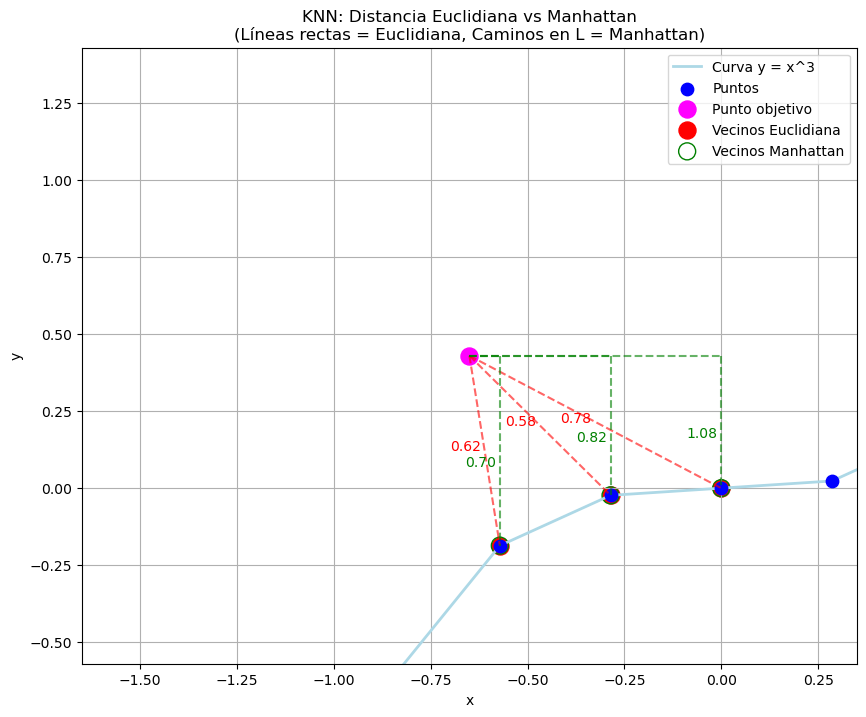

In [4]:
# Datos de ejemplo con y = x^3
x = np.linspace(-2, 2, 15)
y = x**3
data = np.column_stack((x, y))

# Punto objetivo
punto = np.array([-0.65, 0.43])

# Calculo distancias Euclidiana y Manhattan
dist_euclid = np.sqrt(np.sum((data - punto)**2, axis=1))
dist_manhattan = np.sum(np.abs(data - punto), axis=1)

# Vecinos más cercanos (k=3)
k = 3
idx_euclid = np.argsort(dist_euclid)[:k]
idx_manhattan = np.argsort(dist_manhattan)[:k]
vecinos_euclid = data[idx_euclid]
vecinos_manhattan = data[idx_manhattan]

# Gráfico

plt.figure(figsize=(10, 8))
plt.plot(x, y, color='lightblue', linewidth=2, label='Curva y = x^3')
plt.scatter(x, y, color='blue', s=80, label='Puntos', zorder=2)
plt.scatter(*punto, color='magenta', s=150, label='Punto objetivo')

# Vecinos Euclideana
plt.scatter(vecinos_euclid[:,0], vecinos_euclid[:,1], color='red', s=150, label='Vecinos Euclidiana')
for i, vecino in enumerate(vecinos_euclid):
    # Línea recta para distancia Euclidiana
    plt.plot([punto[0], vecino[0]], [punto[1], vecino[1]], 'r--', alpha=0.6)
    # Mostrar valor de la distancia
    dist = dist_euclid[idx_euclid[i]]
    mid_x, mid_y = (punto[0] + vecino[0]) / 2, (punto[1] + vecino[1]) / 2
    plt.text(mid_x- 0.05, mid_y, f'{dist:.2f}', color='red', fontsize=10, ha='center')

# Vecinos Manhattan
plt.scatter(vecinos_manhattan[:,0], vecinos_manhattan[:,1], facecolors='none', edgecolors='green', s=150, label='Vecinos Manhattan')
for i, vecino in enumerate(vecinos_manhattan):
    # Camino en "L" para distancia Manhattan
    plt.plot([punto[0], vecino[0]], [punto[1], punto[1]], 'g--', alpha=0.6)  # Segmento horizontal
    plt.plot([vecino[0], vecino[0]], [punto[1], vecino[1]], 'g--', alpha=0.6)  # Segmento vertical
    # Mostrar valor de la distancia
    dist = dist_manhattan[idx_manhattan[i]]
    mid_x, mid_y = vecino[0], (punto[1] + vecino[1]) / 2
    plt.text(mid_x- 0.05, mid_y - 0.05, f'{dist:.2f}', color='green', fontsize=10, ha='center')

# Ajusto límites para mostrar más contexto (más zoom)
padding = 1
plt.xlim(punto[0] - padding, punto[0] + padding)
plt.ylim(punto[1] - padding, punto[1] + padding)

plt.xlabel('x')
plt.ylabel('y')
plt.title('KNN: Distancia Euclidiana vs Manhattan\n(Líneas rectas = Euclidiana, Caminos en L = Manhattan)')
plt.legend()
plt.grid(True)

# Tabla de distancias
print("Distancias a los vecinos más cercanos:")
print("\nEuclidiana:")
for i, idx in enumerate(idx_euclid):
    print(f"Vecino {i+1}: Punto {data[idx]}, Distancia = {dist_euclid[idx]:.2f}")
print("\nManhattan:")
for i, idx in enumerate(idx_manhattan):
    print(f"Vecino {i+1}: Punto {data[idx]}, Distancia = {dist_manhattan[idx]:.2f}")

plt.show()